In [1]:
# import necessary packages
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import os
import glob
import cv2
import numpy as np
import pandas as pd
#from skimage import data, io, filters
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D
from PIL import Image, ImageEnhance
#from keras.utils import np_utils

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
features=pd.read_csv('/content/drive/MyDrive/features.csv')

In [4]:
features=features.drop('Link',axis=1)
features

,Pen Pressure,Line Spacing,Slant Angle,Baseline angle,Category
0,361.392662,331.040000,5,0.000000,True
1,195.361137,1855.888889,5,6.169961,True
2,431.525255,318.000000,5,65.521539,True
3,286.433345,291.000000,5,70.179114,True
4,1444.462220,503.632653,5,0.000000,True
...,...,...,...,...,...
2285,28.906891,40.000000,-5,0.000000,False
2286,19.029346,899.000000,-5,0.000000,False
2287,14.597426,899.000000,-5,0.000000,False
2288,37.955066,9840.555556,-5,0.000000,False


In [5]:
lables=features['Category']
lables

0        True
1        True
2        True
3        True
4        True
        ...  
2285    False
2286    False
2287    False
2288    False
2289    False
Name: Category, Length: 2290, dtype: bool

In [6]:
features=features.drop('Category',axis=1)

In [14]:
print(features.max())

Pen Pressure       3401.229680
Line Spacing      98965.250000
Slant Angle          15.000000
Baseline angle     1363.664609
dtype: float64


In [18]:
for i in features.columns:
  print(i)

Pen Pressure
Line Spacing
Slant Angle
Baseline angle


In [19]:
for i in features.columns:
  features[i]=((features[i]-features[i].min())/(features[i].max()-features[i].min()))*255

In [20]:
data=[]
for i in range(0,len(features.index)):
  lst=np.float64(features.loc[i].to_numpy());
  kt=lst.copy()
  lst=np.concatenate((lst,lst))
  lst=np.concatenate((lst,kt))
  lst=np.reshape(lst,(4,1,3))
  lst=cv2.resize(lst,(32,32))
  data.append(lst)

In [21]:
data=np.float64(np.array(data))

[[[ 17.43062791   1.5940949  170.        ]
  [ 17.43062791   1.5940949  170.        ]
  [ 17.43062791   1.5940949  170.        ]
  ...
  [ 17.43062791   1.5940949  170.        ]
  [ 17.43062791   1.5940949  170.        ]
  [ 17.43062791   1.5940949  170.        ]]

 [[ 17.43062791   1.5940949  170.        ]
  [ 17.43062791   1.5940949  170.        ]
  [ 17.43062791   1.5940949  170.        ]
  ...
  [ 17.43062791   1.5940949  170.        ]
  [ 17.43062791   1.5940949  170.        ]
  [ 17.43062791   1.5940949  170.        ]]

 [[ 17.43062791   1.5940949  170.        ]
  [ 17.43062791   1.5940949  170.        ]
  [ 17.43062791   1.5940949  170.        ]
  ...
  [ 17.43062791   1.5940949  170.        ]
  [ 17.43062791   1.5940949  170.        ]
  [ 17.43062791   1.5940949  170.        ]]

 ...

 [[  1.5940949  170.           0.        ]
  [  1.5940949  170.           0.        ]
  [  1.5940949  170.           0.        ]
  ...
  [  1.5940949  170.           0.        ]
  [  1.5940949  17

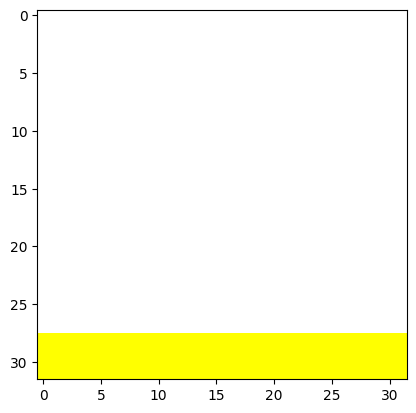

In [25]:
print(data[6])
plt.imshow(data[6])

In [26]:

#Splitting of dataset into training and test dataset
(trainX1, testX, trainY1, testY ) = train_test_split(data, lables, test_size= 0.10, shuffle = True, random_state=42,stratify=lables)
#Evaluate the model
print(trainX1.shape, trainY1.shape, data.shape, lables.shape)
(trainX, valX, trainY, valY ) = train_test_split(trainX1, trainY1, test_size= 0.10, shuffle = True, random_state=42,stratify=trainY1)
# trainX=trainX.reshape(4,1,1)
# testX=trainX.reshape(4,1,1)
# valX=trainX.reshape(4,1,1)
# testY=testY.reshape(len(testY),1)
# valY=valY.reshape(len(valY),1)
print("X_train shape", trainX.shape)
print("y_train shape", trainY.shape)
print("X_test shape", testX.shape)
print("y_test shape", testY.shape)
print("X_Val shape", valX.shape)
print("Y_Val shape", valY.shape)
#trainX /= 255
#valX /= 255
#testX /= 255

(2061, 32, 32, 3) (2061,) (2290, 32, 32, 3) (2290,)
X_train shape (1854, 32, 32, 3)
y_train shape (1854,)
X_test shape (229, 32, 32, 3)
y_test shape (229,)
X_Val shape (207, 32, 32, 3)
Y_Val shape (207,)


In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label = preprocessing.LabelEncoder()
trainY= label.fit_transform(trainY)
testY= label.fit_transform(testY)
valY= label.fit_transform(valY)
print(valY)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


**VGG16 Model**


**Data Augmentation**

**Transfer Learning using VGG16 (Imagenet)**

In [28]:
from tensorflow.keras.applications import VGG16

conv_base=VGG16(weights='imagenet',
                include_top=False,##we only want to use "conv" base
                input_shape=(32,32,3))

58889256/58889256 [==============================] - 4s 0us/step


In [29]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [30]:
model_3=Sequential()

model_3.add(conv_base)
model_3.add(Flatten())
model_3.add(Dense(64,activation='relu'))
model_3.add(Dense(32,activation='relu'))
model_3.add(Dense(16,activation='relu'))
model_3.add(Dense(1,activation='sigmoid'))

In [31]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 14750145 (56.27 MB)
Trainable params: 1475

In [32]:
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf
#from tensorflow_addons.optimizers import AdamW
from tensorflow.keras.optimizers import SGD
opt = Adam(lr=0.0001)
model_3.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator()

In [34]:
def to_tupple(img,label):
  return img,label
def create_fn(x,y):
     x=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
     x=x.shuffle(buffer_size=len(x))
     x=x.map(to_tupple)
     return x

In [35]:
history_VGG=model_3.fit(
   x=trainX,y=trainY,
                              epochs = 100, validation_data=(valX, valY)

)

Epoch 1/100
58/58 [==============================] - 15s 69ms/step - loss: 2.1210 - accuracy: 0.9018 - val_loss: 0.2971 - val_accuracy: 0.9517
Epoch 2/100
58/58 [==============================] - 2s 29ms/step - loss: 0.2783 - accuracy: 0.9515 - val_loss: 0.2119 - val_accuracy: 0.9517
Epoch 3/100
58/58 [==============================] - 2s 30ms/step - loss: 0.2345 - accuracy: 0.9515 - val_loss: 0.1748 - val_accuracy: 0.9517
Epoch 4/100
58/58 [==============================] - 2s 32ms/step - loss: 0.2047 - accuracy: 0.9509 - val_loss: 0.2263 - val_accuracy: 0.9517
Epoch 5/100
58/58 [==============================] - 2s 31ms/step - loss: 0.2272 - accuracy: 0.9515 - val_loss: 0.1863 - val_accuracy: 0.9517
Epoch 6/100
58/58 [==============================] - 2s 30ms/step - loss: 0.1861 - accuracy: 0.9520 - val_loss: 0.1754 - val_accuracy: 0.9517
Epoch 7/100
58/58 [==============================] - 2s 30ms/step - loss: 0.1758 - accuracy: 0.9515 - val_loss: 0.1530 - val_accuracy: 0.9469
Epoch

In [36]:
trainY[1]

0

In [37]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
scores = model_3.evaluate(valX, valY)
print("\nLoss: %.2f%%" % (scores[1]*100))

7/7 [==============================] - 0s 13ms/step - loss: 0.1374 - accuracy: 0.9662

Loss: 96.62%


In [38]:

acc = history_VGG.history['accuracy']
val_acc = history_VGG.history['val_accuracy']

loss = history_VGG.history['loss']
val_loss = history_VGG.history['val_loss']

In [39]:
print(acc,val_acc)

[0.9018338918685913, 0.9514563083648682, 0.9514563083648682, 0.9509169459342957, 0.9514563083648682, 0.9519956707954407, 0.9514563083648682, 0.9595469236373901, 0.9514563083648682, 0.9557713270187378, 0.9595469236373901, 0.9557713270187378, 0.9514563083648682, 0.9514563083648682, 0.9514563083648682, 0.9514563083648682, 0.9514563083648682, 0.9514563083648682, 0.9573894143104553, 0.9519956707954407, 0.9514563083648682, 0.9514563083648682, 0.9514563083648682, 0.9514563083648682, 0.9514563083648682, 0.9514563083648682, 0.954692542552948, 0.9503775835037231, 0.9449838399887085, 0.9514563083648682, 0.9514563083648682, 0.9514563083648682, 0.9514563083648682, 0.9514563083648682, 0.9514563083648682, 0.9514563083648682, 0.9514563083648682, 0.9503775835037231, 0.9514563083648682, 0.9514563083648682, 0.9509169459342957, 0.9514563083648682, 0.9368932247161865, 0.9525350332260132, 0.9422869682312012, 0.9525350332260132, 0.9514563083648682, 0.9525350332260132, 0.9514563083648682, 0.9519956707954407, 

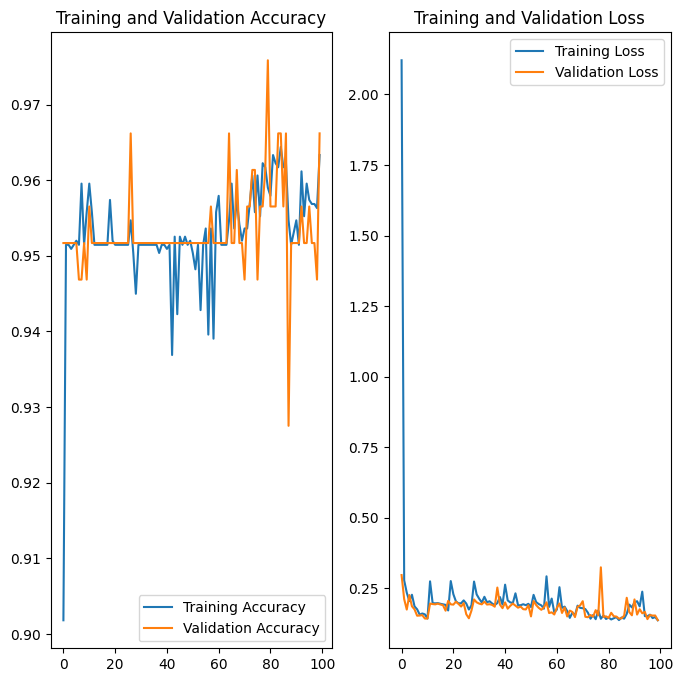

In [40]:
EPOCHS=100
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

7/7 [==============================] - 0s 11ms/step
Accuracy: 0.966183574879227
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       197
           1       0.80      0.40      0.53        10

    accuracy                           0.97       207
   macro avg       0.89      0.70      0.76       207
weighted avg       0.96      0.97      0.96       207

0.4
0.9949238578680203


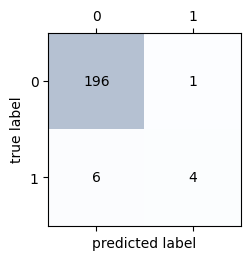

<Axes: >

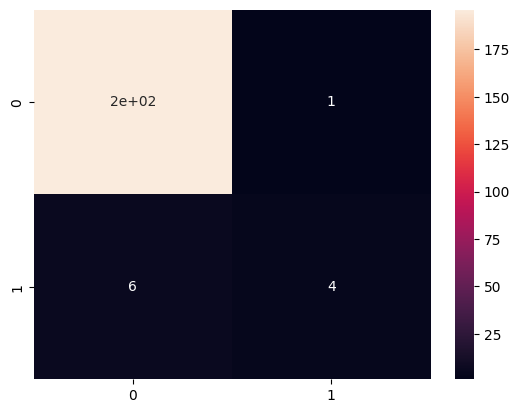

In [41]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
# Model Accuracy, how often is the classifier correct?
predictions = model_3.predict(valX)

predictions = predictions>0.5
#print(predictions)
from sklearn.metrics import classification_report
print("Accuracy:",metrics.accuracy_score(valY, predictions))
print(classification_report(valY, predictions))
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=valY, y_pred=predictions)
sensitivity = recall_score(valY, predictions)
print(sensitivity)
specificity=confmat[0][0]/ (confmat[0][0] + confmat[0][1])
print(specificity)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
     ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
import seaborn as sns
sns.heatmap(confmat, annot=True)

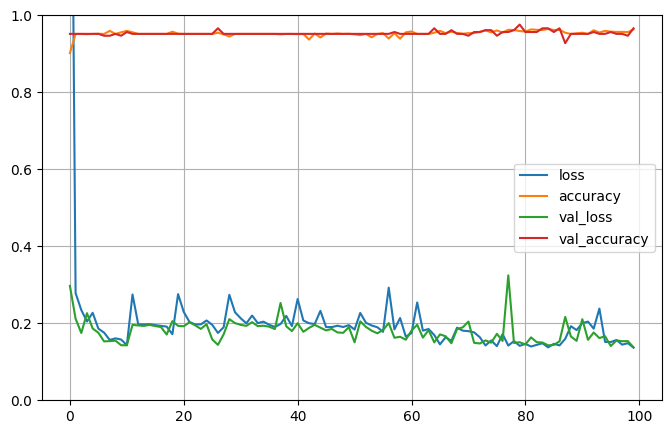

In [42]:
import pandas as pd
pd.DataFrame(history_VGG.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [43]:
scores = model_3.evaluate(testX, testY)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

8/8 [==============================] - 1s 88ms/step - loss: 0.1339 - accuracy: 0.9607

Accuracy: 96.07%
